# Polynomal regression with one variable

Demonstration of polynomial regression on one variable.

https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Generate data

We'll generate some random data to do our polynomail regression on.

In [2]:
# Generate random numbers between 0 and pi/2
n_samples = 100
x = np.random.random(n_samples) * math.pi/2

x = np.sort(x)
y = np.sin(x)

In [3]:
# Make the data "messier" by adding Gaussian blur
sigma = 0.05
x_true = x
y_true = y

x_blur = np.random.randn(n_samples) * sigma
x = x + x_blur

y_blur = np.random.randn(n_samples) * sigma
y = y + y_blur

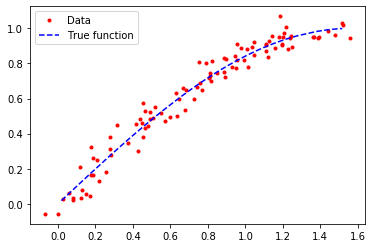

In [4]:
plt.plot(x, y, 'r.', label='Data')
plt.plot(x_true, y_true, 'b--', label='True function')
plt.legend()
plt.show()

## Split into train and test data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# Sort arrays so they plot nicely
order_train = np.argsort(x_train)
x_train = x_train[order_train]
y_train = y_train[order_train]

order_test = np.argsort(x_test)
x_test = x_test[order_test]
y_test = y_test[order_test]

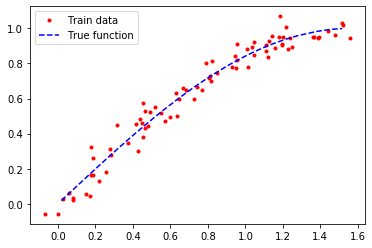

In [7]:
plt.plot(x_train, y_train, 'r.', label='Train data')
plt.plot(x_true, y_true, 'b--', label='True function')
plt.legend()
plt.show()

## Train and test

In [8]:
model = Pipeline([('polynomial', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression())])

# LinearRegression needs 2D input
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
# Make predictions
y_pred = model.predict(x_test)

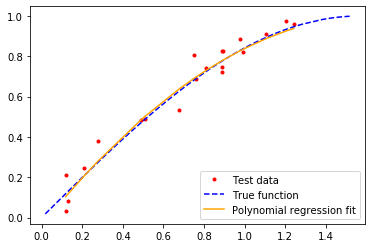

In [10]:
plt.plot(x_test, y_test, 'r.', label='Test data')
plt.plot(x_true, y_true, 'b--', label='True function')
plt.plot(x_test, y_pred, color='orange', label='Polynomial regression fit')
plt.legend()
plt.show()